# Traffic Light Classifier
---
*Adapted from Final Project of Computer Vision and Machine Learning: Introduction to Self-Driving Cars, Nanodegree of Udacity*

In this project, we will build a classifier for images of traffic lights. There will three types of light based on which one of the three lights is illuminated: red, green, or yellow.

To do this, we will apply four tasks:

1. **Loading and visualizing the data**
    In this step, we will try to be familiar with the data by loading the images of the traffic light and visualize them.
2. **Pre-processing**
    Standardizing the input images and output labels is important. This will help to analyze the rest of the input images with the same classification pipeline. This step also help us to know about the output to expect when classifying a *new* image.
3. **Feature extraction**. 
    In this step, we'll extract some features from each image, These features will be used to distinguish and classify images.
4. **Classification and visualizing error**. 
    Last, we'll write one function that uses your features to classify *any* traffic light image. This function will take in an image and output a label.

Below is the sample images from the dataset (from left to right: red, green, and yellow traffic lights):
<img src="images/all_lights.png" width="50%" height="50%">


### Import resources

First, we will import the required libraries and resources

In [10]:
import cv2 # computer vision library
import helpers # helper functions

import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # for loading in images

%matplotlib inline

In [11]:
# Image data directories
IMAGE_DIR_TRAINING = "traffic_light_images/training/"
IMAGE_DIR_TEST = "traffic_light_images/test/"

In [12]:
# Using the load_dataset function in helpers.py
# Load training data
IMAGE_LIST = helpers.load_dataset(IMAGE_DIR_TRAINING)


Shape of the image:  (43, 17, 3)
Images label:  red


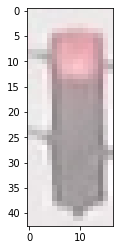

In [13]:
## TODO: Write code to display an image in IMAGE_LIST (try finding a yellow traffic light!)
## TODO: Print out 1. The shape of the image and 2. The image's label

# The first image in IMAGE_LIST is displayed below (without information about shape or label)
selected_image = IMAGE_LIST[0][0]
plt.imshow(selected_image)
print('Shape of the image: ', selected_image.shape)
print('Images label: ', IMAGE_LIST[0][1])

In [4]:
!{sys.executable} -m pip install pandas

zsh:1: parse error near `-m'


In [5]:
sys.executable

NameError: name 'sys' is not defined